You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label

x_data = np.reshape(x_l,(x_l.shape[0],-1))
print(x_data.shape)
print(y_l.shape)

(2062, 4096)
(2062, 10)


In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data,y_l,test_size = 0.3,random_state = 5)



[]

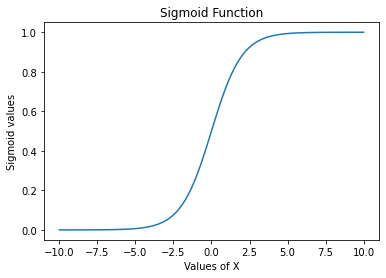

In [92]:
#sigmoid function
def sigmoid_outer(x) :
    return 1/(1+np.exp(-x))
dummy_x = np.linspace(-10,10,100)
#sigmoid_values =  1 + ( 1 + np.exp(-dummy_x) )
#sigmoid_values = 1 / sigmoid values

plt.plot(dummy_x,sigmoid_outer(dummy_x))
plt.xlabel("Values of X")
plt.ylabel("Sigmoid values")
plt.title("Sigmoid Function")
plt.plot()

In [ ]:
# Logistic Regression is a binary classification model . In case of a multi class classification we have two options
which can be followed to classify the data.

1] One vs All Method
2] One vs One Method

1] One vs All Method :- In this method suppose if we have to classify the given data into 4 features , we create 4 
    logistic regression models which will give the probability that the data belongs to that class . Based on that
    probability ,we select the highest probability the class belongs to and classify it into that class.

2] One vs One Method :- In this method for the same example (as mentioned above) , instead of finding the probability
    of the data point we try to classify the data , and return the answer which got highest votes . For the example,
    we create a model for every two classes (1 vs 2 , 1 vs 3 , 1 vs 4 , 2 vs 3 , 2 vs 4 , 3 vs 4) and try to predict
    the test data which class it belongs to for each of the class . Then based on the votes , we findout which class
    has highest votes and return that as answer.

In [4]:
class logistic_regression :
    
    def __init__(self):
        pass
    
    def fit(self,training_data,training_labels,learning_rate,iterations):
        
        self.training_data = training_data
        self.training_labels = training_labels
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.training_data_transpose = np.transpose(self.training_data)
        self.weights = []
        self.cost_list = []
        self.b_list = []
        for i in range(self.training_labels.shape[1]) :
            labels = self.training_labels[:,i]
            
            w = np.zeros(self.training_data.shape[1])
            b = 0
            cost = 0
            internal_list = []
            for j in range(self.iterations) :
                z = np.dot(self.training_data,w)
                sigmoid_value = self._sigmoid(z,b)
                w,b = self._update_weights(sigmoid_value,w,b,labels)
                cost = self._cost_function(sigmoid_value,w,b,labels)
                internal_list.append(cost)
            
            #title_for_graph = "Cost function graph for "+str(i)
            #plt.plot(internal_list)
            #plt.title(title_for_graph)
            #plt.show()
            
            self.weights.append(w)
            self.cost_list.append(internal_list[-1])
            self.b_list.append(b)
        
        plt.plot(self.cost_list)
        plt.title("Cost function for each label")
        plt.show()
    
    
    def _cost_function(self,sigmoid_value,w,b,labels) :
        
        equation_part1 = np.log(sigmoid_value)
        equation_part1 = np.dot(self.training_data_transpose,equation_part1)
        equation_part1 = np.sum(equation_part1)
        
        equation_part2 = np.log(1-sigmoid_value)
        y_transpose = 1 - labels
        y_transpose = np.transpose(y_transpose)
        equation_part2 = np.dot(y_transpose,equation_part2)
        equation_part2 = np.sum(equation_part2)
        
        return_cost = equation_part1 - equation_part2
        return_cost = return_cost / len(labels)
        
        return (return_cost*-1)
    
    def _update_weights(self,sigmoid_value,w,b,labels):
        
        slope = np.matmul(self.training_data_transpose,(sigmoid_value-labels))
        #slope = slope / len(labels)
        gradient_descent = (self.learning_rate * slope)/len(labels)
    
        
        #w = w - w*gradient_descent
        w = w - gradient_descent
        #b = b - (np.sum(1-labels)*self.learning_rate)
        #b = b - (np.sum(slope)*self.learning_rate)
        b = b - (np.sum(sigmoid_value - labels))
        b = b / len(labels)
        
        return w,b
    
    def _sigmoid(self,z,b) :
        
        ans = np.exp(-(z+b))
        ans = 1 + ans
        ans = 1/ans
        
        return ans
    
    def _predict_label(self,test_features) :
        
        list1 = []
        for i in range(len(self.weights)) :
            z_here = np.dot(test_features,self.weights[i])
            #print(z_here.shape)
            list1.append(self._sigmoid(z_here,self.b_list[i]))
        
        return list1.index(max(list1))
            
    def predict(self,testing_data) :
        
        list1 = []
        for i in range(testing_data.shape[0]) :
            list1.append(self._predict_label(testing_data[i]))
        
        return np.array(list1)
            
    

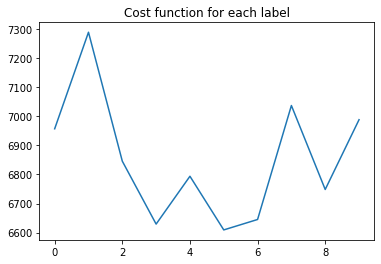

In [19]:
my_model = logistic_regression()
my_model.fit(x_train,y_train,0.001,2000)

# 0.001 250 -> 53.31
# 0.001 500 -> 60.90
# 0.001 750 -> 63.65


In [20]:
pred1 = my_model.predict(x_test)
#print(len(pred1))
#wrong_pred = np.count_nonzero(pred1-y_test)
#print(wrong_pred)
#print(len(pred1) - wrong_pred)

In [21]:
print(pred1)

[9 8 1 2 6 2 4 3 0 0 4 5 4 0 3 0 9 4 8 4 4 0 3 9 4 9 0 6 4 0 4 8 2 3 0 1 9
 1 1 4 7 9 3 1 9 1 0 0 4 2 4 7 9 5 3 0 0 0 1 8 9 1 3 3 2 4 0 3 5 4 5 5 9 4
 0 0 0 7 4 9 0 9 8 1 1 4 3 7 9 3 5 1 8 0 7 6 2 9 4 8 0 5 2 7 7 5 6 5 5 2 4
 5 7 9 3 9 3 5 1 2 3 7 9 7 0 0 2 7 7 0 7 3 9 9 6 8 7 2 8 9 0 3 5 1 6 1 5 1
 5 8 0 0 2 6 2 1 0 0 5 0 2 3 9 0 0 9 7 0 5 9 0 7 8 3 6 5 0 1 0 5 0 8 9 2 4
 6 3 3 4 8 3 4 3 2 2 4 8 3 1 4 9 2 4 4 2 1 0 4 1 3 1 9 0 2 1 0 1 5 3 5 8 2
 0 3 0 3 0 7 2 7 9 0 3 3 3 1 6 5 8 5 7 6 1 3 7 9 0 3 9 1 7 5 7 3 9 8 7 7 5
 4 2 4 7 4 2 1 9 1 0 1 1 3 4 5 5 2 0 1 7 7 9 7 4 2 0 9 5 2 9 4 2 1 4 8 9 6
 5 2 0 8 5 5 3 9 5 5 3 9 9 1 8 0 1 6 8 1 3 7 1 0 1 4 5 5 1 1 1 2 8 0 5 0 8
 7 7 9 5 5 4 9 4 1 2 4 3 1 0 4 3 5 5 2 5 5 1 8 8 7 2 8 9 0 8 4 0 9 7 6 1 5
 9 7 7 8 8 1 4 8 8 8 4 9 1 4 4 7 5 6 1 1 3 7 1 3 9 8 5 8 4 4 0 5 8 7 7 0 3
 3 3 4 4 4 8 7 8 2 5 3 0 8 7 4 9 9 2 2 2 5 7 5 5 8 5 1 4 3 4 5 0 5 5 2 1 7
 5 4 4 1 4 1 5 9 5 0 4 8 1 0 3 5 1 8 1 1 2 4 5 2 9 1 4 1 1 9 6 9 8 7 3 6 9
 1 2 3 0 4 2 9 8 9 5 0 8 

In [22]:
correct_pred = 0
incorrect_pred = 0
for i in range(len(pred1)) :
    dummy_array = np.zeros(y_test.shape[1])
    dummy_array[pred1[i]] = 1
    
    if np.count_nonzero(dummy_array == y_test[i]) == 10 :
        correct_pred = correct_pred+1
    else :
        incorrect_pred = incorrect_pred+1

acc = correct_pred / (correct_pred + incorrect_pred)
print(acc)

0.6365105008077544


In [23]:
#one vs one logistic regression

class logistic_regression_2 :
    
    def __init__(self):
        pass
    
    def fit(self,training_data,training_labels,learning_rate,iterations):
        
        self.training_data = training_data
        self.training_labels = training_labels
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.training_data_transpose = np.transpose(self.training_data)
        self.weights = []
        self.cost_list = []
        self.b_list = []
        self._create_index_list()
        self._fit_combinations()
    
    def _create_index_list(self):
        
        self.indexes_list = []
        for i in range(self.training_labels.shape[1]):
            self.indexes_list.append([])
            
        for i in range(self.training_data.shape[0]) :
            list1 = list(self.training_labels[i])
            index = list1.index(max(list1))
            self.indexes_list[index].append(self.training_data[i])
        
            #print(self.training_labels[i].index(max(self.training_labels[i])))
            
    def _fit_combinations(self) :
        
        self.combination_list = []
        
        for i in range(self.training_labels.shape[1]):
            for j in range(i+1,self.training_labels.shape[1]):
                self.combination_list.append([i,j])
                train_data = []
                for arr in self.indexes_list[i] :
                    train_data.append(arr)
                for arr in self.indexes_list[j]:
                    train_data.append(arr)
                
                train_data = np.array(train_data)
                train_labels = [0] * len(self.indexes_list[i])
                train_labels_2 = [1] * len(self.indexes_list[j])
                train_labels.extend(train_labels_2)
                train_labels = np.array(train_labels)
                self._fit_2(train_data,train_labels,i,j)
                #print(train_labels.shape)
                #print(train_data.shape)
                
                
                
            
        
    def _fit_2(self,train_data,train_labels,i,j) :

        w = np.zeros(self.training_data.shape[1])
        b = 0
        cost = 0
        internal_list = []
        
        for r in range(self.iterations) :
            
            z = np.dot(train_data,w)
            sigmoid_value = self._sigmoid(z,b)
            w,b = self._update_weights(sigmoid_value,w,b,train_data,train_labels)
            
            #cost = self._cost_function(sigmoid_value,w,b,train_data,train_labels)
            #internal_list.append(cost)
        
        #print("completed")
        """
        plt.plot(internal_list)
        plt.title("Cost function for "+str(i)+" "+str(j))
        plt.show()
        
        self.weights.append(w)
        self.cost_list.append(internal_list[-1])
        self.b_list.append(b)
        """
        self.b_list.append(b)
        self.weights.append(w)
        
    
    def _cost_function(self,sigmoid_value,w,b,train_data,train_labels) :
        
        equation_part1 = np.log(sigmoid_value)
        equation_part1 = np.dot(np.transpose(train_data),equation_part1)
        equation_part1 = np.sum(equation_part1)
        
        
        equation_part2 = np.log(1-sigmoid_value)
        y_transpose = 1 - train_labels
        y_transpose = np.transpose(y_transpose)
        equation_part2 = np.dot(y_transpose,equation_part2)
        equation_part2 = np.sum(equation_part2)
        
        return_cost = equation_part1 - equation_part2
        return_cost = return_cost / len(train_labels)
        
        return return_cost
            
        

    def _update_weights(self,sigmoid_value,w,b,train_data,train_labels):
        
        slope = np.matmul(np.transpose(train_data),(sigmoid_value-train_labels))
        
        #slope = slope / len(labels)
        gradient_descent = (self.learning_rate * slope)/len(train_labels)
    
        
        #w = w - w*gradient_descent
        w = w - gradient_descent
        #b = b - (np.sum(1-labels)*self.learning_rate)
        #b = b - (np.sum(slope)*self.learning_rate)
        b = b - (np.sum(sigmoid_value - train_labels))
        b = b / len(train_labels)
        
        return w,b

    def _sigmoid(self,z,b) :
        
        ans = np.exp(-(z+b))
        ans = 1 + ans
        ans = 1/ans
        
        return ans
    
    def _predict_class(self,test_features) :
        
        count_array = [0] * self.training_labels.shape[1]
        
        for i in range(len(self.weights)):
            z = np.dot(test_features,self.weights[i])
            value = self._sigmoid(z,self.b_list[i])
            if value >= 0.5 :
                value = 1
            else :
                value = 0
            value = self.combination_list[i][value]
            count_array[value] = count_array[value]+1
                
        return count_array.index(max(count_array))
        
    def predict(self,testing_data) :
        
        pred_list = []
        for i in range(testing_data.shape[0]) :
            pred_list.append(self._predict_class(testing_data[i]))
        
        return pred_list

In [24]:
import time
start_time = time.time()
my_model_2 = logistic_regression_2()
my_model_2.fit(x_train,y_train,0.01,1000)
end_time = time.time()

print(end_time - start_time)

389.1761827468872


In [25]:
pred2 = my_model_2.predict(x_test)
#print(pred2)

In [26]:
correct_pred = 0
incorrect_pred = 0
for i in range(len(pred2)) :
    dummy_array = np.zeros(y_test.shape[1])
    dummy_array[pred2[i]] = 1
    
    if np.count_nonzero(dummy_array == y_test[i]) == 10 :
        correct_pred = correct_pred+1
    else :
        incorrect_pred = incorrect_pred+1

acc = correct_pred / (correct_pred + incorrect_pred)
print(acc)

0.7447495961227787


In [27]:
from sklearn.linear_model import LogisticRegression
y_train_new = []

for i in range(y_train.shape[0]):
    list1 = list(y_train[i])
    y_train_new.append(list1.index(max(list1)))
logreg_model = LogisticRegression(multi_class = "multinomial",solver = "saga").fit(x_train,y_train_new)


/home/revanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [28]:
y_test_new = []
for i in range(y_test.shape[0]):
    list1 = list(y_test[i])
    y_test_new.append(list1.index(max(list1)))
    
logreg_model.score(x_test,y_test_new)

0.7560581583198708

In [ ]:
My one vs all Logistic Regression Model gave accuracy of 63.65 when learning rate is 0.001 and iterations where 2000
My one vs one Logistic Regression Model gave accuracy of 74.47 when learning rate is 0.01 and iterations are 1000
Logistic Regression from scikit learn gave an accuracy of 75.60 and it is throwing a message that it did not converge.


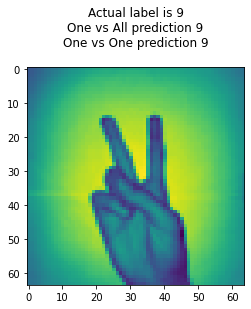

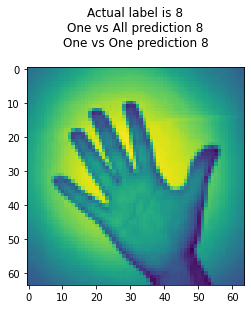

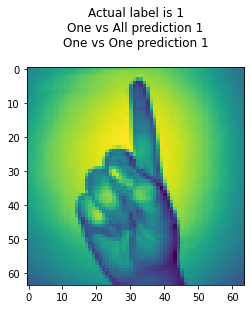

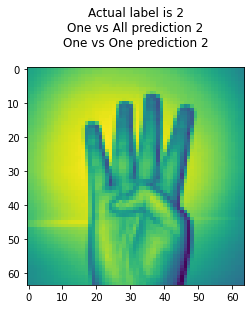

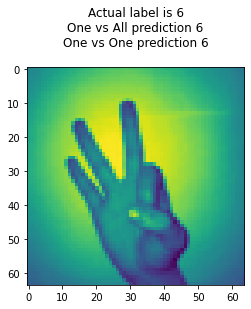

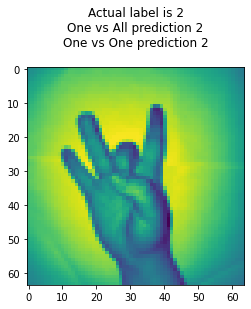

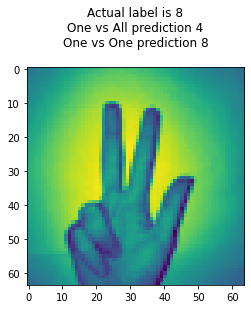

In [38]:
images_display = 7
index_list = []

for i in range(images_display) :
    index = np.random.randint(0,len(x_test))
    
    image = np.reshape(x_test[index],(64,64))
    plt.imshow(image)
    
    list1 = list(y_test[i])
    list1 = list1.index(max(list1))
    str1 = "Actual label is "+str(list1)+"\n" + "One vs All prediction "+str(pred1[i]) + "\n"+"One vs One prediction " + str(pred2[i])+"\n" 
    #str2 = "Prediction by LogReg " + str(logreg_model.predict(x_test[i]))
    plt.title(str1)
    plt.show()
    

In [ ]:
The results differ because of the following reasons :- 
    
    1] One vs One has higher accuracy more than One Vs All because it has more number of models and will have a less 
        chance of wrong predictions.
    
    